<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Bivariate Analysis

<font color=darkblue>
    
Through bivariate analysis we try to analyze two variables simultaneously. As opposed to univariate analysis where we check the characteristics of a single variable, in bivariate analysis we try to determine if there is any relationship between two 
variables.

&nbsp;

There are essentially 3 major scenarios that we will come accross when we perform bivariate analysis
1. Both variables of interest are qualitative
2. One variable is qualitative and the other is quantitative
3. Both variables are quantitative

&nbsp;

For the purpose of this exercise, we will explore few most popular techniques to perform bivariate analysis.

The following plots are not limited to the headings they are under. They are the options we have if we face a certain scenario.




### Numerical  vs. Numerical
    1. Scatterplot
    2. Line plot
    3. Heatmap for correlation
    4. Joint plot

### Categorical vs. Numerical
    1. Bar chart
    2. Voilin plot
    3. Categorical box plot
    4.Swarm plot
    

## Two Categorical Variables 
    1. Bar chart
    2. Grouped bar chart
    3. Point plot

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Case Study
    <span style="font-family: Arial; font-weight:bold;font-size:0.7em;color:#b53f05"> (Suicide Rates Overview 1985 to 2016)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.1 Loading the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.2 import the dataset 

In [3]:
data=pd.read_csv('master.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.3 check the data head()

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.4 Check the data.describe()

In [5]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.5 Check the columns 

In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.6 Checking the shape of data

In [7]:
data.shape

(27820, 12)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.7 Count the datatypes

In [8]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.8 Check the data set information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.9  Checking the dataset missing values

In [10]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
generation,0,0.000000
gdp_per_capita ($),0,0.000000
gdp_for_year ($),0,0.000000
country-year,0,0.000000
suicides/100k pop,0,0.000000
population,0,0.000000
suicides_no,0,0.000000
age,0,0.000000
sex,0,0.000000


In [11]:
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe() #descriptive stats of continuous columns

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.10 Frequency table for Age 

One-Way Tables

In [12]:
my_tab = pd.crosstab(index=data["age"],  # Make a crosstab
                     columns="count")                  # Name the count column
my_tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.11 Bar plot to check Number of Suicides by top Countries

# This is an example of Numerical vs Categorical.

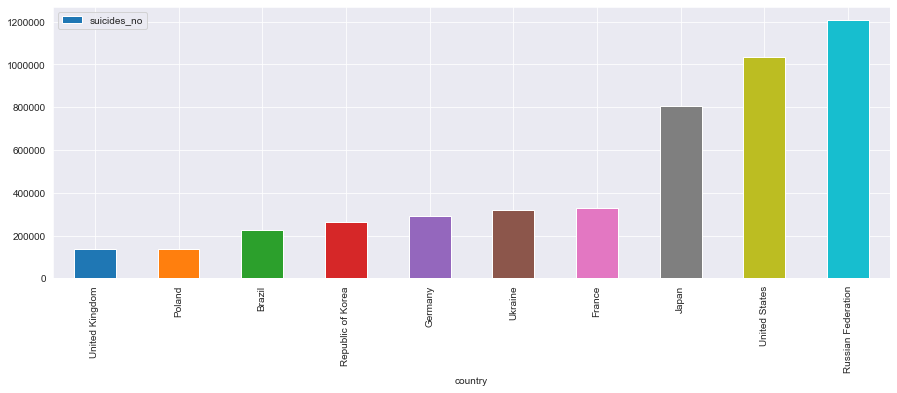

In [13]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',
                                                                                                           y='suicides_no',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

<font color = darkblue>

* Russia has the highest number of suicides followed by the US and Japan
* Russia, the US and Japan have exceptionally high counts of suicides compared to the others in the lot

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.12 Bar plot to check Number of Suicides by bottom Countries

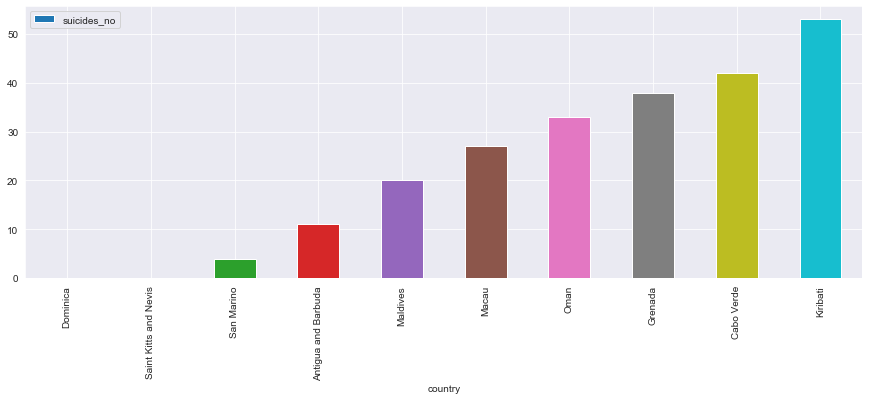

In [14]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).head(10).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.13 Bar plot for Number of Suicides Vs Age

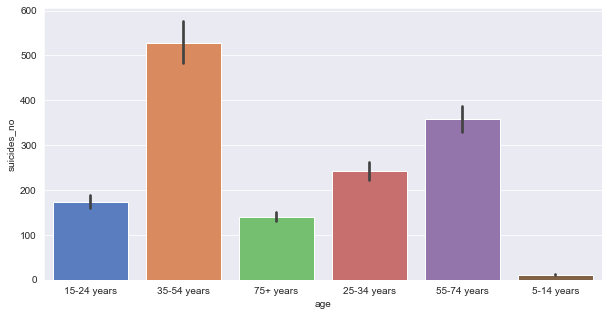

In [15]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')  # barplot

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.14 Bar plot  Number of Suicides Vs Sex

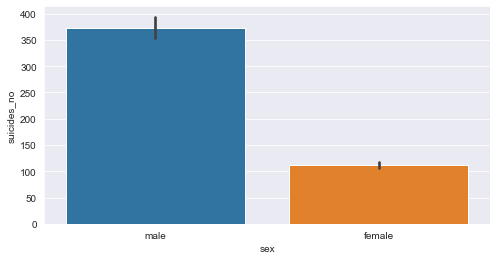

In [16]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="sex", y="suicides_no", data=data)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.15 Bar plot Number of Suicides Vs generation

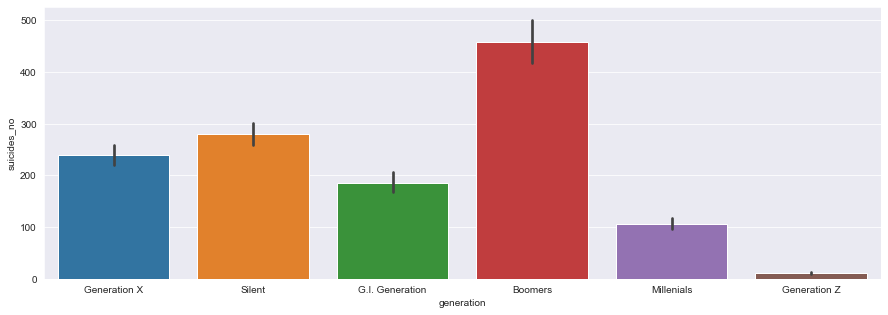

In [17]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='generation', y='suicides_no', data=data)

<font color = 'darkblue'>
    
* Suicides are the highest among the Boomers and lowest among Generation Z

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.15 Scatter plot Number of Suicides Vs population

# This is an examples of  Numerical  vs. Numerical

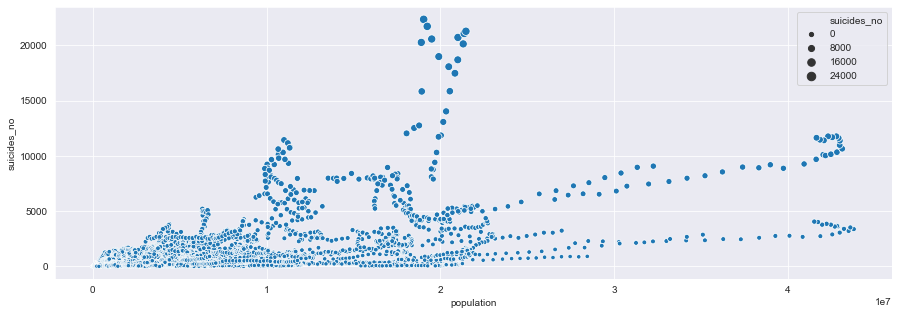

In [18]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=data['population'],y='suicides_no', data=data, size = "suicides_no") # scatter plot

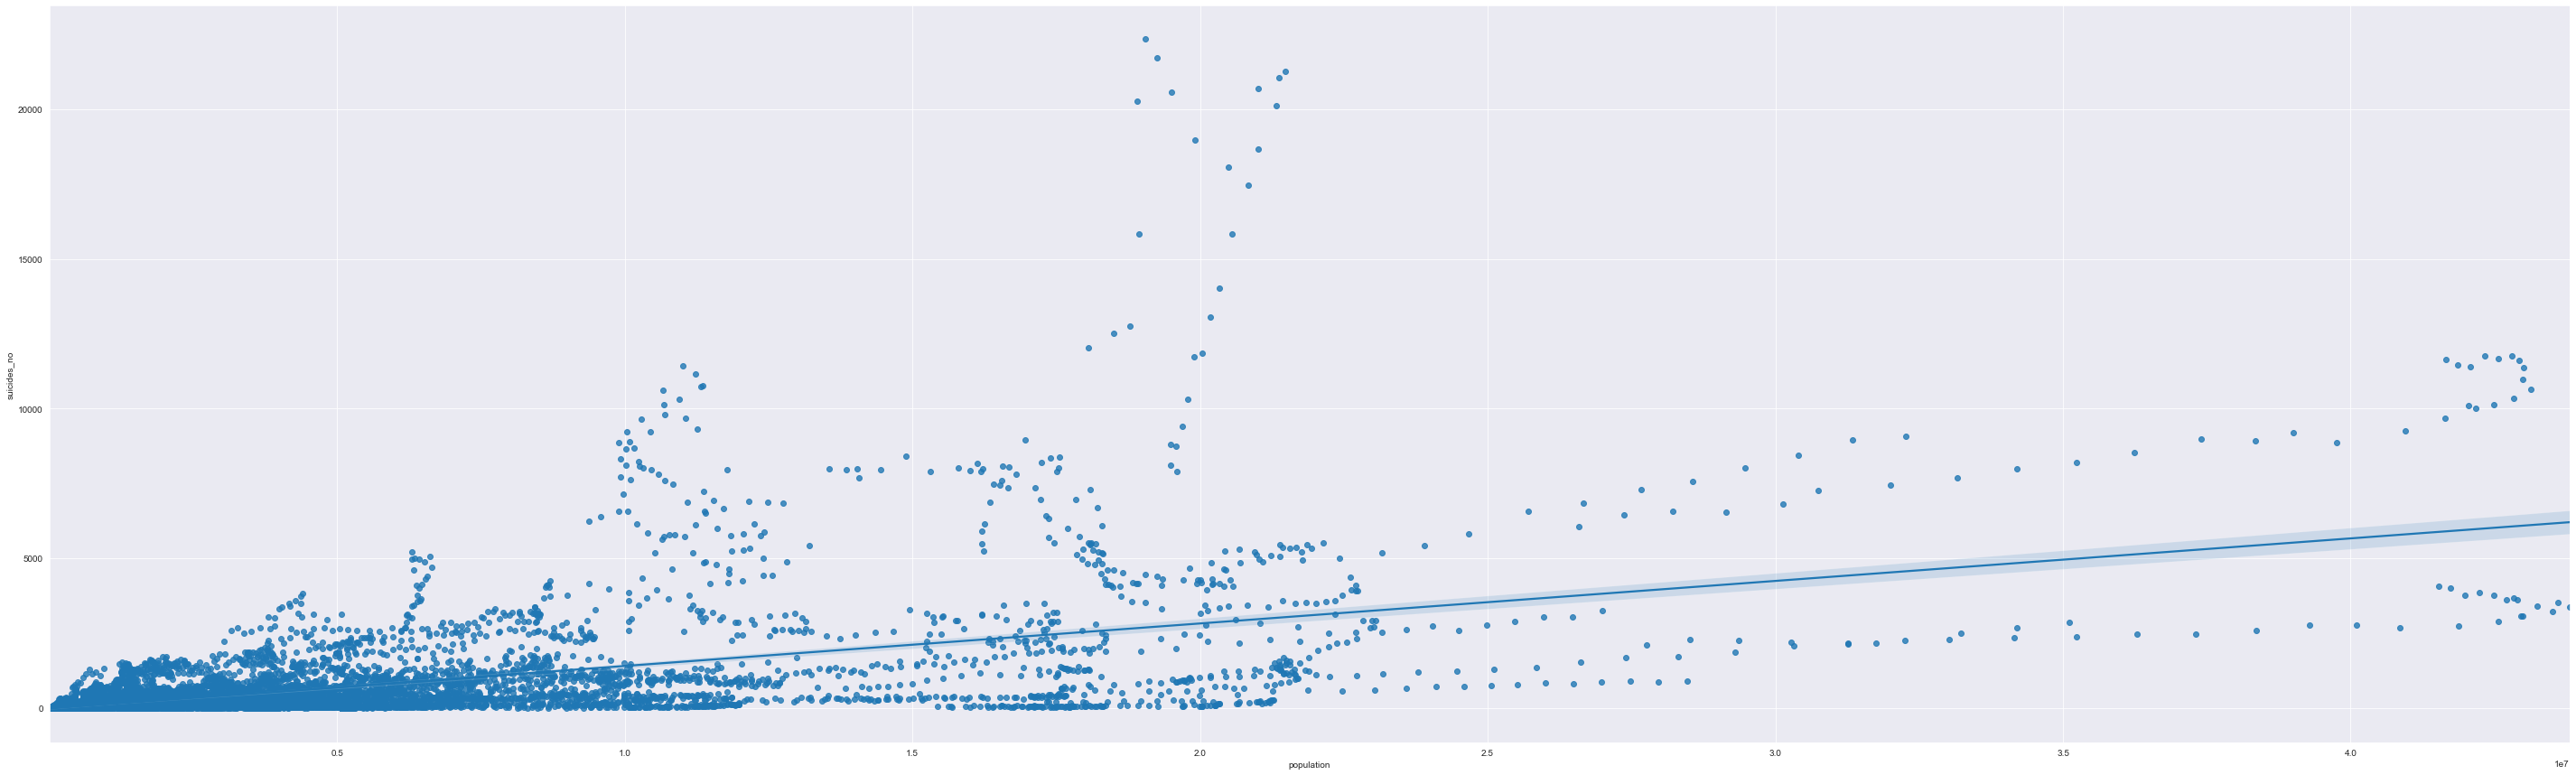

In [19]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='population',y='suicides_no', data=data ) # regression plot - scatter plot with a regression line

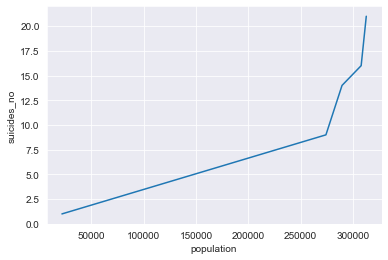

In [20]:
#Here we plotting a line plot.
sns.lineplot(x='population',y='suicides_no', data=data.head() )

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Scatter plot Number of Suicides/100kPopulation Vs GDP Per Capita

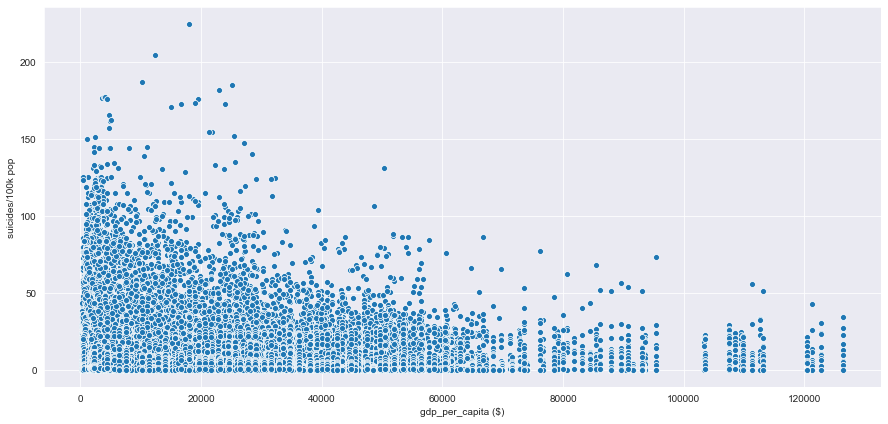

In [21]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data) # scatter plot 
plt.show()

<font color = 'darkblue'>
               
* Looks like higher suicide rates are a bit more prevalent in countries with higher GDP
* However, it does't look like there any significant correlation between the two

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Correlation among pairs of continuous variables

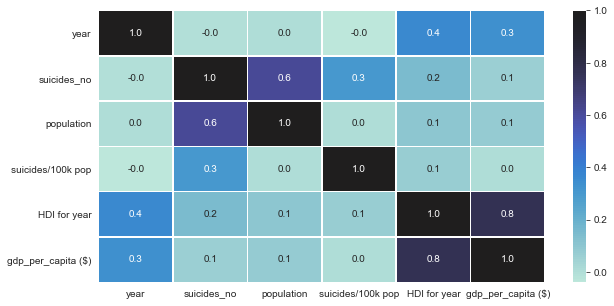

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

<font color = 'darkblue'>

* Instead of doing a simple df.corr(), we can use the heatmap when there are large number of variables
* The color helps with picking out the most correlated easily
* In the above case, we don't have a lot of variables the plot is just for demonstration
* The darker the color higher the correlation
* None of the attributes seem have correlation of real significance
* Some obvious correlations are that in a larger population, it is very likely that the number of suicides will be more
* Human Development Index - gdp per capita is the only pair with the most correlation 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.17.1 Bar plot To check Number of suicides by sex and age (three variables used to generate a single plot)

# This is an example of Numerical and 2 Categorical variables.

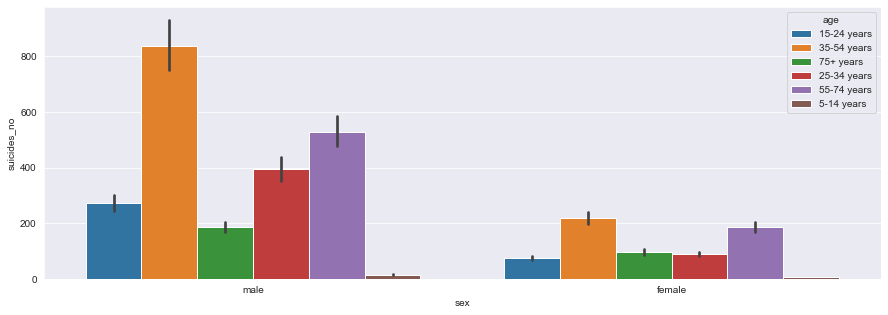

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='age')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.17.2 Bar plot To check Number of suicides by sex and Generation(three variables used to generate a single plot)

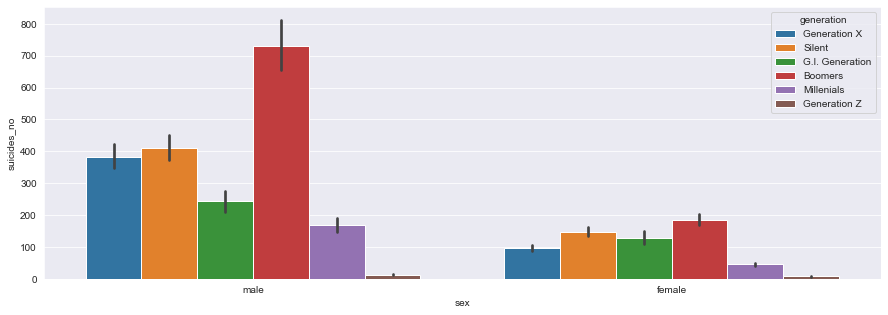

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='generation')
plt.show()

<font color = 'darkblue'>
    
* Suicides in males apart from being higher, has a slight variation in distribution accross generations compared to the suicides of females accross generation
* In case of males, Generation X has higher suicide numbers compared to G.I Generation but incase of females, it is the opposite

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.18 Checking the No.of suicides: Country Vs Sex

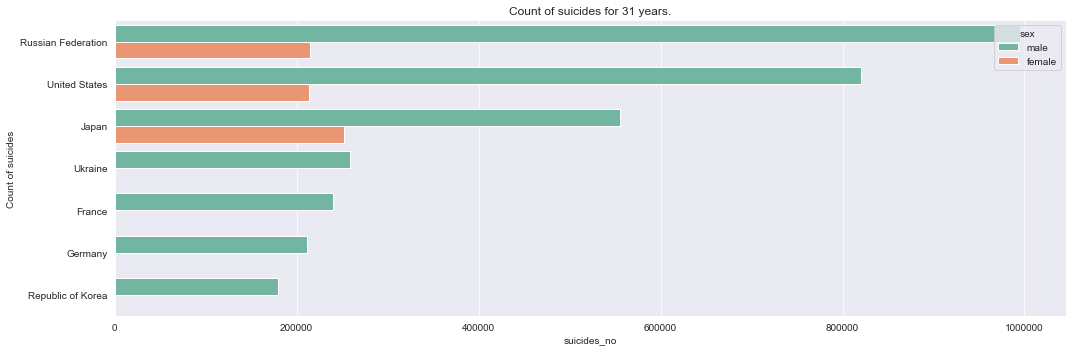

In [25]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()  # number of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False) # sort in descending order
most_cont_m = suic_sum_m.head(10)  # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country',x='suicides_no',hue='sex',data=most_cont_m,palette='Set2');

plt.ylabel('Count of suicides')
plt.tight_layout()


<font color = 'darkblue'>

* Japan has a higher proportion of female suicides compared to the countries with overall suicide rates even more high

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Average number of suicides accross each generation for a given gender along with the confidence intevals - Point Plot

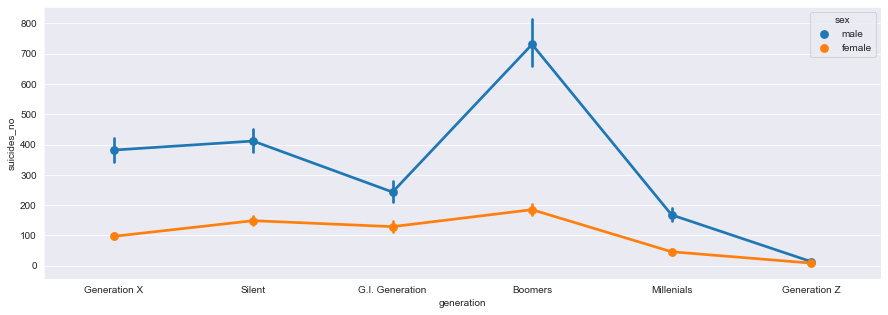

In [26]:
plt.figure(figsize=(15,5))

sns.pointplot(x="generation", y="suicides_no", hue = 'sex',  data=data)
plt.show()

<font color = 'darkblue'>

* The graph tells us the average suicides along with the confidence intervals 
* Suicides among females in general don't seem to be fluctuating a lot
* Average suicides of Gen-Z are almost equally distributed accross genders

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Distribution of population accross each generation - Violin plot

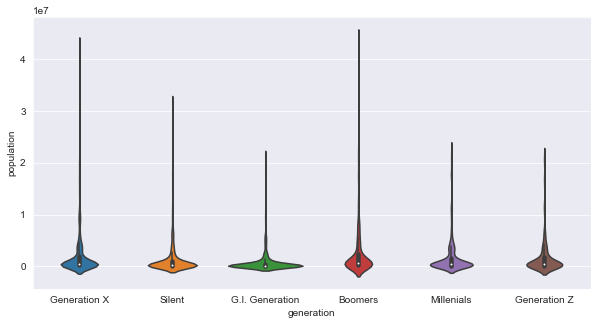

In [27]:
plt.figure(figsize=(10,5))
sns.violinplot(x=data.generation, y=data['population'])
plt.show()

<font color = 'darkblue'>

* The plot is similar to a box plot but here, we get a density function
* Distribution of population accross every eneration is highly skewed
* Potential of lot of outliers
* Try it yourself -  Go ahead and check if there really are a lot of outliers in populations accross each generation
  Hint: use a boxplot

# Checking trends with Temporal Data 

Temporal data is simply data that represents a state in time, such as the land-use patterns of Hong Kong in 1990,
or total rainfall in Honolulu on July 1, 2009. Temporal data is collected to analyze weather patterns and other environmental variables, monitor traffic conditions, study demographic trends, and so on. This data comes from many sources ranging
from manual data entry to data collected using observational sensors or generated from simulation models. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Checking pattern using Trend plot (1985-2015) suides Rate Vs Years

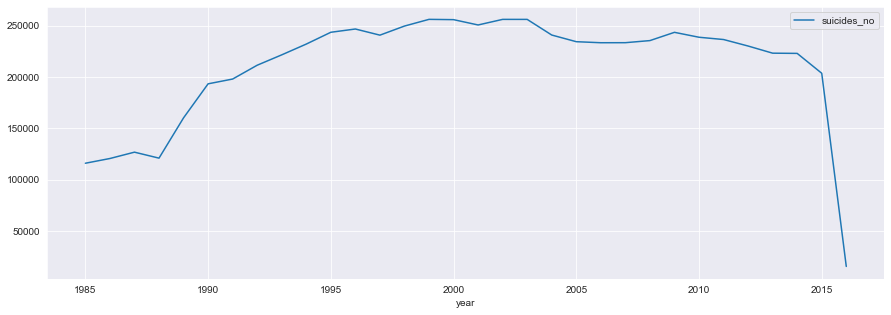

In [28]:
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Checking pattern using Trend plot (1985-2015) Population Vs Years

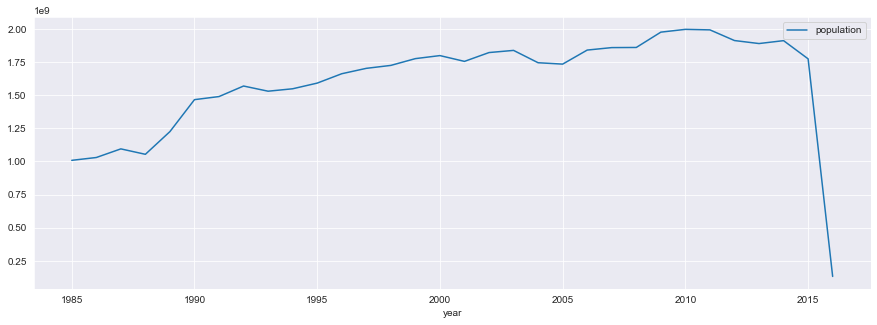

In [29]:
data[['year','population']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Checking pattern using Trend plot (1985-2015) suicides/100k pop Vs Years

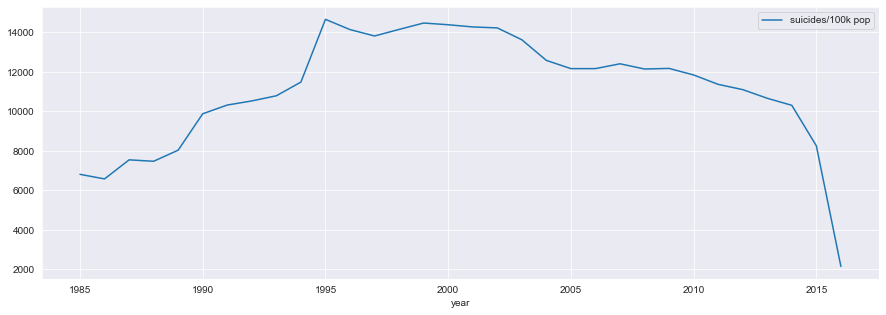

In [30]:
data[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

# Pandas Profiling with IPL data

Generates profile reports from a pandas DataFrame. 
pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

Link - https://pypi.org/project/pandas-profiling/

#Installation step 
#!pip install pandas-profiling
#or 
import sys
!{sys.executable} -m pip install pandas-profiling



!pip install -U pandas-profiling

In [31]:
#import pandas_profiling
import pandas_profiling 

The data is of IPL 2019 https://www.kaggle.com/divjain/ipl_data_till_2019/downloads/ipl_data_till_2019.zip/4#match_data.csv


In [32]:
df = pd.read_csv('match_data.csv')

It has many useful functionalities but the best one is to generate an EDA report as given below.

In [33]:
#Getting the pandas profiling report 
pandas_profiling.ProfileReport(df)

Number of variables,24
Number of observations,746
Total Missing (%),20.9%
Total size in memory,140.0 KiB
Average record size in memory,192.1 B
Numeric,5
Categorical,17
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [34]:
#Getting an htl file as output here 
pandas_profiling.ProfileReport(df).to_file("output.html")


You can see the report in your directory in html format. It will give you a structured summarized view of statistics of every columns with interactive options to explore more.

# Steps Ahead 
Try it yourself - 

Create a Pandas Profile report for inninigs_data.csv in IPL Data.

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#ez0028"> Happy Learning 